# Project Name - Bengaluru House Prediction

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas as pd

In [5]:
# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\IMARTICUS SOURCE\Data Science\Data Science Projects\archive (5)\Bengaluru_House_Data.csv")
# Check shape of the dataset (Number of rows and columns)
print("Shape of the dataset:", df.shape)


Shape of the dataset: (13320, 9)


In [6]:
df.shape

(13320, 9)

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
# Count the value of every columns 


for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

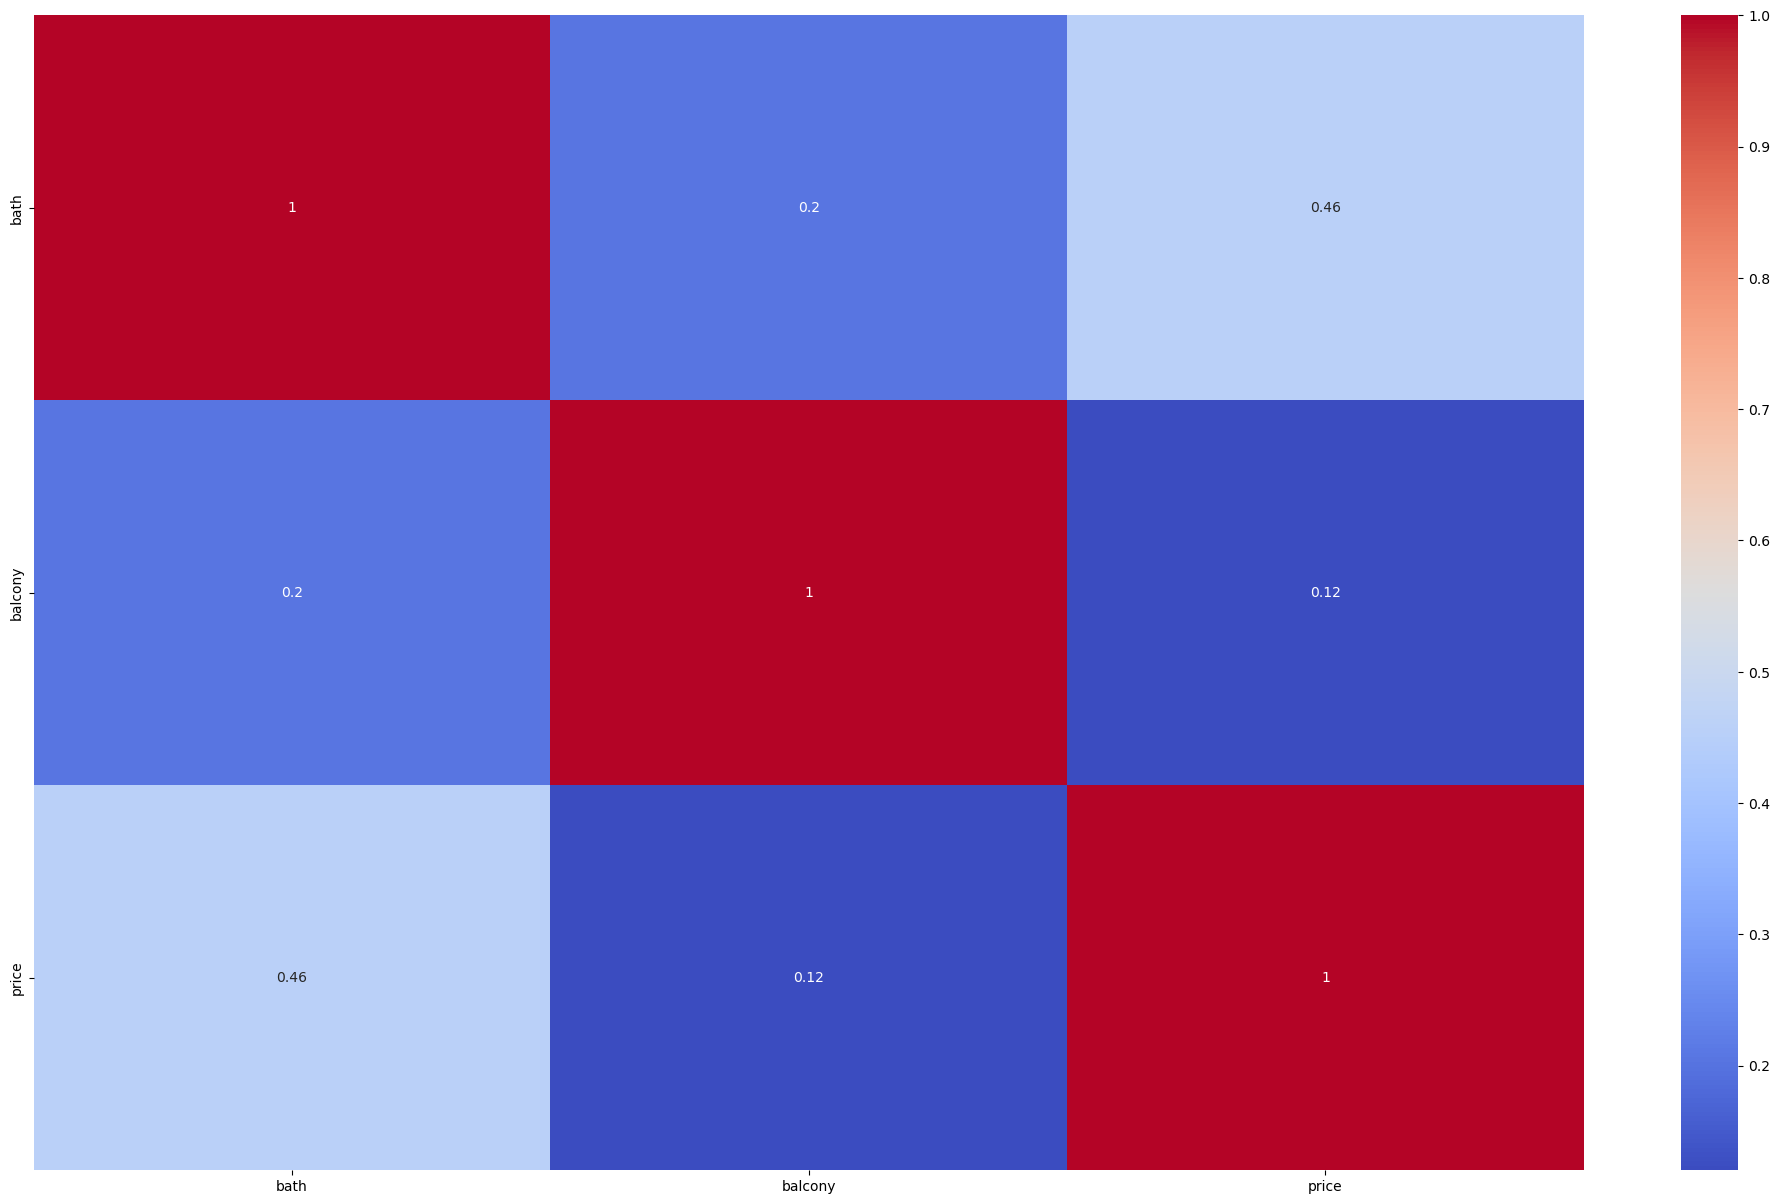

In [10]:
plt.figure(figsize=(25, 15))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2g', cmap='coolwarm')
plt.show()

In [11]:
# Check null values present in dataset

df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [16]:
df['location'] = df['location'].fillna('Whitefield')
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [17]:
df['size']=df['size'].fillna('2 BHK')
df['bath'] = df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
# to overcome the Bedroom and BHK problem in size column
# Split that column and store the intiger value and create a column that is (bhk)

df['bhk'] = df['size'].str.split().str.get(0).astype(int)
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
# We found that in (total_sqft) column have some RANGE value so we need to fix tham 


def ConvertRang(x):
    temp=x.split('-')
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(ConvertRang)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# convert price in 100000 because of the remove outliers

df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [22]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [23]:
df['location'].value_counts()

location
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [24]:
# as we can see that in (LOCATION) columan have 1305 value and if we are going to convert that values using ONE-HOTE-ENCODE that will give use multiple value so that we will reduse that values
# if the value location value count less than or Equal to 10 than we will convert that into OTHER 
df['location']=df['location'].apply(lambda x: x.strip()) # Remove White space before and after
location_count=df['location'].value_counts()
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64

In [25]:
# Replace rare categories in 'location' column
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

# -----------------------------
# Outlier Detection & Removal
# Using IQR Method
# -----------------------------

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to all numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

# Summary statistics
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10231.000000,10231.000000,10231.000000,10231.000000,10231.000000
mean,1291.362766,2.244844,67.472339,2.391262,5129.805319
std,358.910431,0.618678,30.285012,0.637289,1450.713138
min,276.000000,1.000000,8.000000,1.000000,850.000000
25%,1080.000000,2.000000,45.000000,2.000000,4031.717664
50%,1230.000000,2.000000,60.000000,2.000000,4968.553459
75%,1500.000000,3.000000,84.975000,3.000000,6052.904128
max,2550.000000,4.000000,167.000000,4.000000,9480.337079


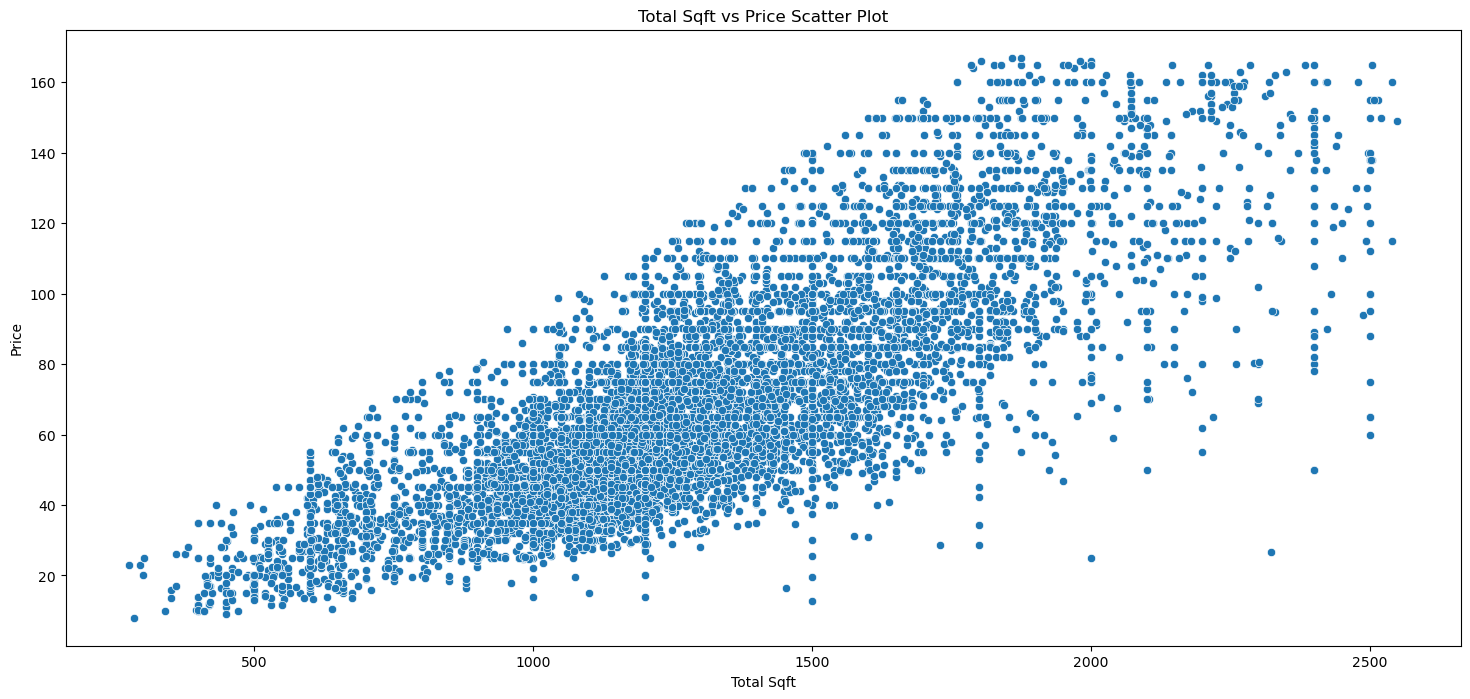

In [26]:
plt.figure(figsize=(18,8))
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Total Sqft vs Price Scatter Plot")
plt.show()


In [27]:
sns.boxplot(df['total_sqft'])

<Axes: ylabel='total_sqft'>

In [28]:
(df['total_sqft']/df['bhk']).describe()

count    10231.000000
mean       550.407711
std        111.707721
min        100.000000
25%        486.666667
50%        550.000000
75%        605.000000
max       1806.000000
dtype: float64

In [29]:
# Here we filter that where is the sqft >= 300 remove that 
df = df[((df['total_sqft']/df['bhk']) >= 300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10139.000000,10139.000000,10139.000000,10139.000000,10139.000000
mean,1296.803379,2.244206,67.686920,2.385738,5120.291216
std,355.390784,0.613306,30.263896,0.631611,1439.397864
min,300.000000,1.000000,9.000000,1.000000,850.000000
25%,1086.000000,2.000000,45.265000,2.000000,4030.858962
50%,1234.600000,2.000000,60.000000,2.000000,4960.000000
75%,1500.000000,3.000000,85.000000,3.000000,6031.223893
max,2550.000000,4.000000,167.000000,4.000000,9463.157895


In [30]:
df.shape

(10139, 7)

In [31]:
df.price_per_sqft.describe()

count    10139.000000
mean      5120.291216
std       1439.397864
min        850.000000
25%       4030.858962
50%       4960.000000
75%       6031.223893
max       9463.157895
Name: price_per_sqft, dtype: float64

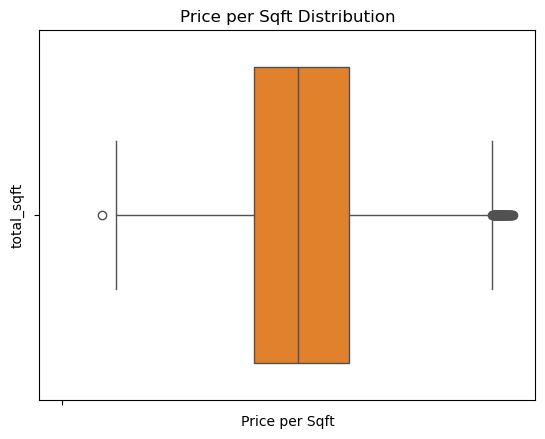

In [32]:
sns.boxplot(x=df['price_per_sqft'])
plt.title("Price per Sqft Distribution")
plt.xlabel("Price per Sqft")
plt.show()

In [33]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame() # Create a Output dataframe 
    for key, subdf in df.groupby('location'): # Using Groupby first we found the KEY and sub DataFrame of that key
        m = np.mean(subdf.price_per_sqft) # calculate the "mean" of "price_per_sqft" of 1 location
        
        st = np.std(subdf.price_per_sqft)# calculate the "std" of "price_per_sqft" of 1 location
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))] # filter of that sub Dataframe that near by 1 mean and std and DROP outher price
        # means that in sub dataframe(subdf) price_per_sqft between (mean-std)  and (mean+std) keep that
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
        
    return df_output

In [34]:
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000
mean,1291.044976,2.238753,65.506807,2.382175,4992.220094
std,346.707128,0.599105,25.997824,0.617140,1091.459813
min,350.000000,1.000000,10.000000,1.000000,2090.909091
25%,1085.000000,2.000000,47.000000,2.000000,4216.525879
50%,1232.000000,2.000000,60.000000,2.000000,4934.210526
75%,1490.000000,3.000000,78.295000,3.000000,5691.811793
max,2550.000000,4.000000,165.000000,4.000000,9165.302782


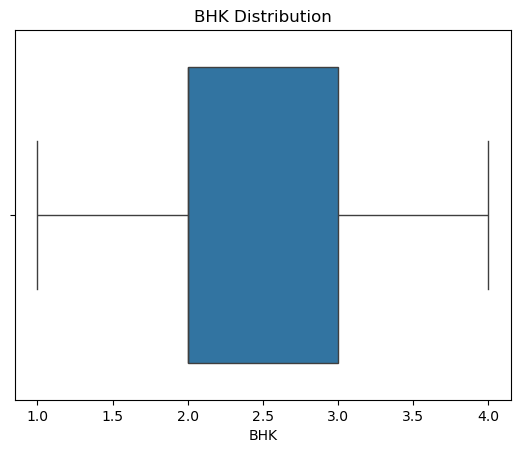

In [35]:
sns.boxplot(x=df['bhk'])
plt.title("BHK Distribution")
plt.xlabel("BHK")
plt.show()

In [36]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [37]:
df = bhk_outlier_remover(df)
df.shape

(5251, 7)

In [38]:
df.drop(columns=['size', 'price_per_sqft'], inplace=True)

In [39]:
# Cleaned Data

df.head()

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2024.0,3.0,157.0,3
1,1st Phase JP Nagar,1394.0,2.0,100.0,2
2,1st Phase JP Nagar,1590.0,3.0,131.0,3
3,1st Phase JP Nagar,1180.0,2.0,88.5,2
4,1st Phase JP Nagar,1200.0,2.0,86.0,2


In [40]:
df.to_csv('Cleaned_data.csv')
X = df.drop(columns=['price'])
y = df['price'] 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(4200, 4)
(1051, 4)


In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Column transformer for encoding categorical variables
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

# Create pipeline
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    LinearRegression()
)

# Fit model
pipe.fit(X_train, y_train)

C:\Users\Admin\Downloads\New folder\New folder\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [42]:
from sklearn.pipeline import make_pipeline

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

# 1. Column transformer (for 'location')
column_trans = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['location'])
    ],
    remainder='passthrough'
)

# 2. Linear Regression pipeline (no normalize=True)
pipe_lr = Pipeline(steps=[
    ('columntransformer', column_trans),
    ('standardscaler', StandardScaler()),
    ('linearregression', LinearRegression())   # <- remove normalize=True
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression R2: 0.9219616875667935


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import pickle

# Column transformer
column_trans = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['location'])
    ],
    remainder='passthrough'
)

# Final Ridge model pipeline
pipe_ridge = Pipeline(steps=[
    ('columntransformer', column_trans),
    ('standardscaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))  # you can tune alpha later
])

pipe_ridge.fit(X_train, y_train)

y_pred_ridge = pipe_ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))

# Save model
with open("RidgeModel.pkl", "wb") as f:
    pickle.dump(pipe_ridge, f)

Ridge R2: 0.9219695578566854


In [58]:
import pickle
import pandas as pd

# Load model
with open("RidgeModel.pkl", "rb") as f:
    model = pickle.load(f)

# Example: one sample input (must match your training features)
sample = pd.DataFrame([{
    'location': 'Kengeri',
    'total_sqft': 1200,
    'bath': 1,
    'bhk': 1
}])

predicted_price = model.predict(sample)[0]
print("Predicted price:", predicted_price)

Predicted price: 57.62345993034737
